# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Path of Input Data Files

In [3]:
inputfile1 = "../data/Ramky_Chiller1.csv"
inputfile2 = "../data/Ramky_Chiller2.csv"

In [4]:
data1 = pd.read_csv(inputfile1)

In [5]:
data3 = data1

In [6]:
data2 = pd.read_csv(inputfile2)

In [7]:
data1.head(5)

,ProcessedStartDate,startvalue,ProcessedEndDate,endValue,hourdifference
0,"12/19/2018, 3:00:02 PM",6846108.6,"12/19/2018, 4:00:02 PM",6846129.6,20.9
1,"12/19/2018, 4:00:03 PM",6846129.6,"12/19/2018, 5:00:03 PM",6846154.7,25.1
2,"12/19/2018, 6:00:02 PM",6846179.3,"12/19/2018, 7:00:02 PM",6846203.3,24.0
3,"12/19/2018, 7:00:02 PM",6846203.9,"12/19/2018, 8:00:02 PM",6846227.9,24.0
4,"12/19/2018, 8:00:02 PM",6846228.4,"12/19/2018, 9:00:02 PM",6846252.5,24.0


In [8]:
data2.head(5)

,ProcessedStartDate,startvalue,ProcessedEndDate,endValue,hourdifference
0,"12/19/2018, 3:00:02 PM",212712.4,"12/19/2018, 4:00:02 PM",212940.9,228.4
1,"12/19/2018, 4:00:03 PM",212944.7,"12/19/2018, 5:00:03 PM",213213.9,269.3
2,"12/19/2018, 6:00:02 PM",213489.1,"12/19/2018, 7:00:02 PM",213752.1,263.1
3,"12/19/2018, 7:00:02 PM",213755.9,"12/19/2018, 8:00:02 PM",214017.2,261.4
4,"12/19/2018, 8:00:02 PM",214020.9,"12/19/2018, 9:00:02 PM",214224.5,203.7


## Plotting data to see ambiguity in data

In [24]:
data1[['hourdifference']].idxmin()

hourdifference    7246
dtype: int64

In [25]:
data2[['hourdifference']].idxmin()

hourdifference    7482
dtype: int64

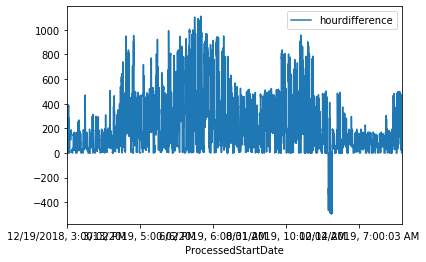

In [11]:
data1.plot(x='ProcessedStartDate',y='hourdifference')

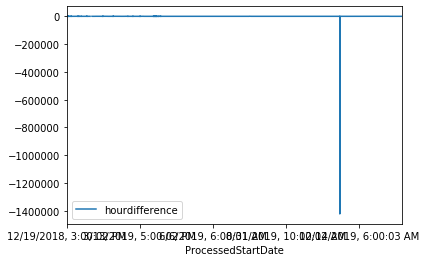

In [12]:
data2.plot(x='ProcessedStartDate',y='hourdifference')

In [8]:
data3['hourdifference'] = data1['hourdifference'] + data2['hourdifference']

In [9]:
data3.head(5)

,ProcessedStartDate,startvalue,ProcessedEndDate,endValue,hourdifference
0,"12/19/2018, 3:00:02 PM",6846108.6,"12/19/2018, 4:00:02 PM",6846129.6,249.3
1,"12/19/2018, 4:00:03 PM",6846129.6,"12/19/2018, 5:00:03 PM",6846154.7,294.4
2,"12/19/2018, 6:00:02 PM",6846179.3,"12/19/2018, 7:00:02 PM",6846203.3,287.1
3,"12/19/2018, 7:00:02 PM",6846203.9,"12/19/2018, 8:00:02 PM",6846227.9,285.4
4,"12/19/2018, 8:00:02 PM",6846228.4,"12/19/2018, 9:00:02 PM",6846252.5,227.7


In [10]:
data3 = data3.rename(columns = {'ProcessedStartDate':'datetime','hourdifference':'consumption'})

#### Replaced Missing values with 0 because at that time chiller was off.

In [11]:
data3['consumption'].fillna(0,inplace=True)

#### Rounded Energy consumption values for ease in model training

In [12]:
data3.consumption = data3.consumption.round()

### Save new dataframe as csv file

In [13]:
headers = ['datetime','consumption']

In [14]:
data3.to_csv('../data/data.csv',columns = headers,index=False)